# Circular Region of Interest (ROI) tutorial

This notebook is meant to teach the circular ROI function in PlantCV. 

In [1]:
# Plotting backend
%matplotlib notebook
# Import Python packages 
from plantcv import plantcv as pcv
from plantcv.parallel import WorkflowInputs


In [2]:
# Input/output options
args = WorkflowInputs(
    images=["imgs/maize.jpg"],    
    names="image1",
    result="roi_tutorial_results.json",
    outdir=".",
    writeimg=True,
    debug="plot",
    sample_label="maize"
    )

In [3]:
# Set debug parameter
pcv.params.debug = args.debug
# Set (optional) parameters 
pcv.params.sample_label = args.sample_label
pcv.params.line_thickness = 15

<IPython.core.display.Javascript object>


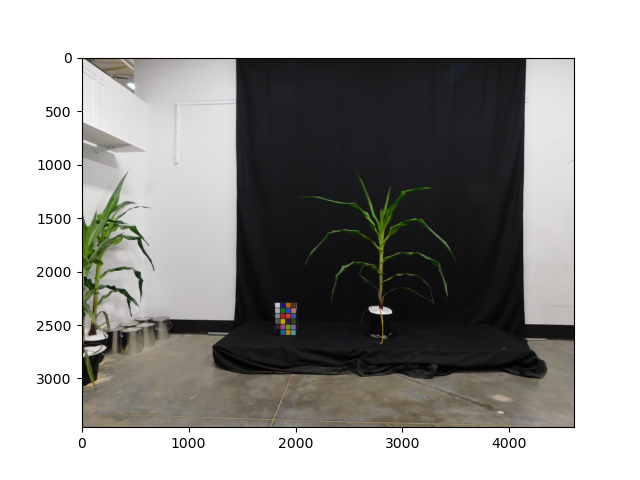

In [4]:
# Read in the image data 
img, filename, path = pcv.readimage(filename=args.image1)

To isolate an object (or multiple objects in this example image) from the background, one or more regions of interest can be used to keep objects from one portion of the image. Often images contain noise around the border and we can filter these objects out by filtering on the Region that has the Objects of Interest (e.g. plants).

<IPython.core.display.Javascript object>


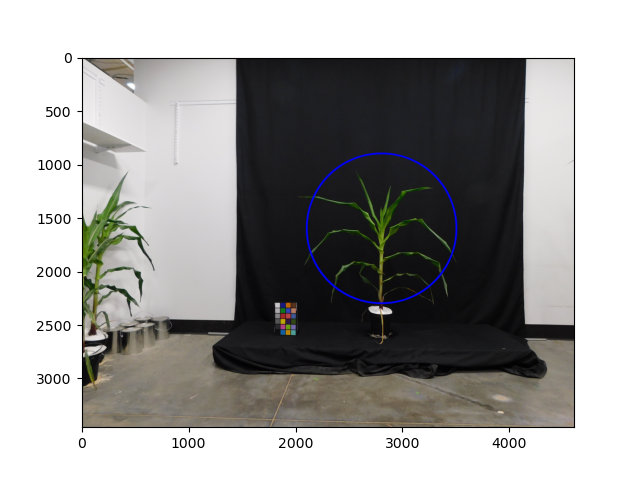

In [5]:
# We define the circular region interest by x,y for the center, and r for the radius of the circle to get made 
circle_roi = pcv.roi.circle(img=img, x=2800, y=1600, r=700)


The filtering actually happens on a binary mask where 0 (black) pixels are deselected and pixels with the value 255 (white) are what we want to segment out from the image. 

<IPython.core.display.Javascript object>


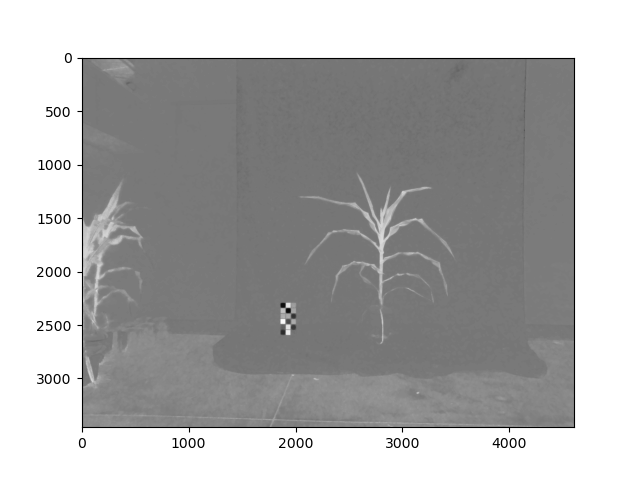

In [6]:
b_gray = pcv.rgb2gray_lab(rgb_img=img, channel="b")

<IPython.core.display.Javascript object>


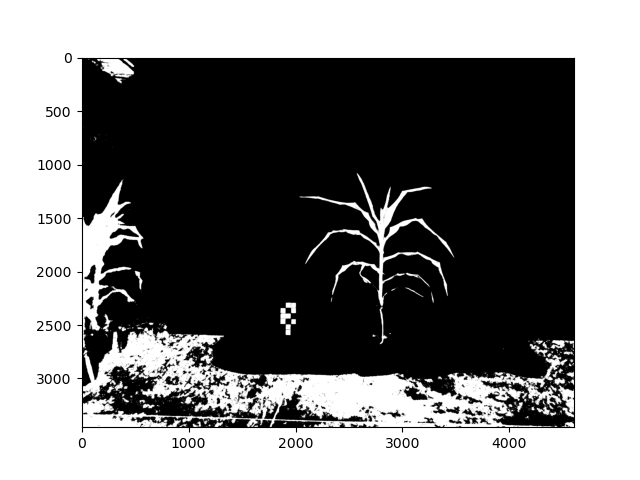

In [7]:
# The plant material is lighter than the background in our grayscale image so the object_type is "light"
bin_mask = pcv.threshold.binary(gray_img=b_gray, threshold=135, object_type="light")

<IPython.core.display.Javascript object>


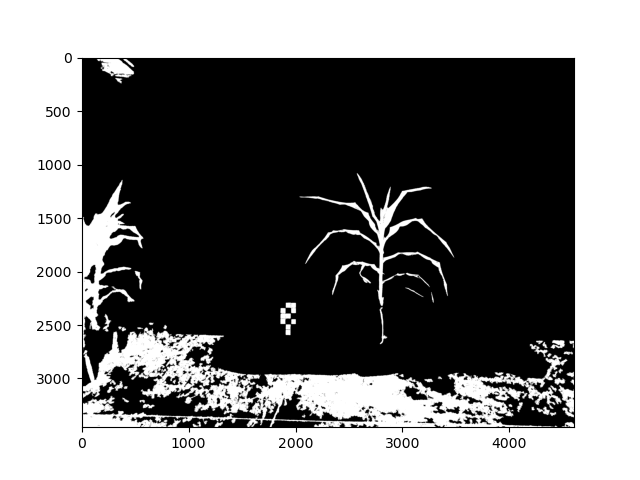

In [8]:
# Clean small noise first to help with the speed of the filtering step 

# Fill in small objects (if an object is smaller than the `size` input variable it will get removed)
cleaned_mask = pcv.fill(bin_img=bin_mask, size=500)



<IPython.core.display.Javascript object>


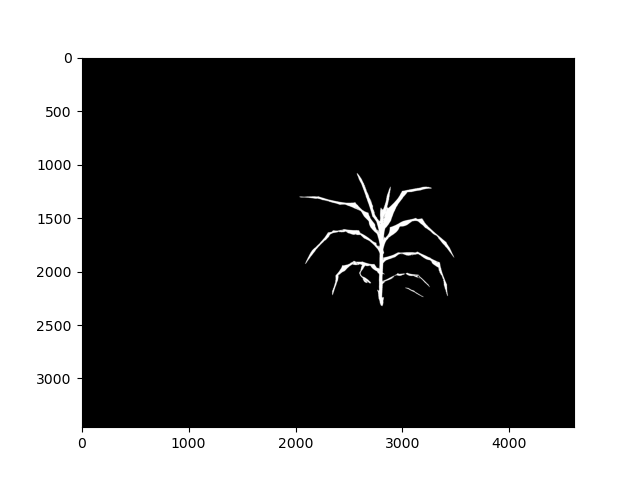

In [9]:
# Make a new filtered mask that only keeps the plants in your ROI and not objects outside of the ROI
# We have set to partial here so that if a leaf partially overlaps but extends outside of your ROI, it 
# will still be selected. 

# Inputs for the filtering function:
#    mask            = the clean mask you made above
#    roi            = the region of interest you specified above
#    roi_type       = 'partial' (default, for partially inside the ROI), 'cutto' (hard cut off), or 
#                     'largest' (keep only largest object)

filtered_mask  = pcv.roi.filter(mask=cleaned_mask, roi=circle_roi, roi_type='partial')


<IPython.core.display.Javascript object>


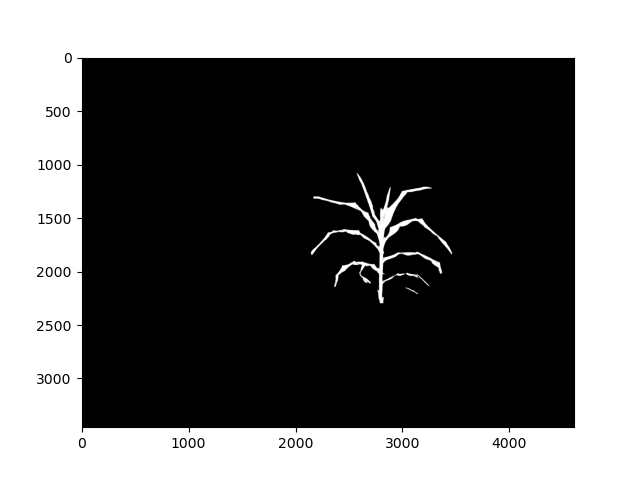

In [10]:
# What would it look like to use the "cutto" method? 

filtered_mask2  = pcv.roi.filter(mask=cleaned_mask, roi=circle_roi, roi_type='cutto')


Successfully filtered out non-plant material! Look ready to analyze? 

<IPython.core.display.Javascript object>


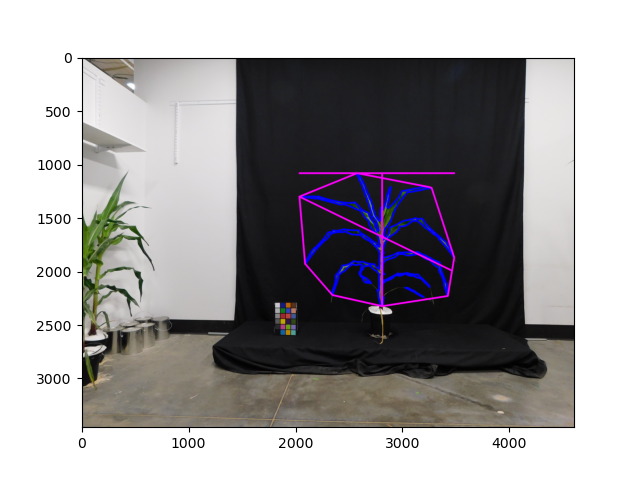

In [11]:
shape_img = pcv.analyze.size(img=img, labeled_mask=filtered_mask)

Small shifts in the camera or tray of plants can cause these hard-coded regions prone to issues in time-series datasets. Consistency is key if the goal is to batch process many images in a dataset with a singular workflow! 

In [ ]:
# Save stored data out to a file 

pcv.outputs.save_results(filename=args.result, outformat="json")